#### 申告額に応じて参加者の順序を決める状況のシミュレーション
- 各参加者の真の評価額 $v_i$ が区間 $[v_{\min}, v_{\max}]$ 上の一様分布に従って発生すると仮定する。

- 参加者全員が申告額 $\hat{v}_i$ を正直に真の評価額 $v_i$ そのものとする。
  $$
      \hat{v}_i = v_i
  $$

- 整列後の順序を示す番号 $k = \sigma(i)$ は 申告額 $a_i = \hat{v}_i$ の大小関係に応じたものとなる。
  $$
  \begin{aligned}
      \hat{v}_{(1)} < \hat{v}_{(2)} < \cdots < \hat{v}_{(k)} < \cdots < \hat{v}_{(n)} \\
  \end{aligned}
  $$


$\hat{v}_i$: array([7.94960894, 4.58636232, 6.42718392, 8.68756151, 5.53368073])

original index: [0 1 2 3 4]
sorted index: [1 4 2 0 3]


$\hat{v}_{(k)}$: array([4.58636232, 5.53368073, 6.42718392, 7.94960894, 8.68756151])

$\sigma(i)$: array([3, 0, 2, 4, 1])

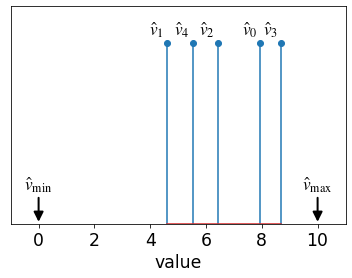

In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from IPython.display import display_markdown

num_bidders = 5 
vmin, vmax = (0, 10)
v = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=num_bidders)
v_hat = v # 正直な申告
sort_axis = 0
idx = np.argsort(v_hat, axis=sort_axis)
v_hat_k = np.take_along_axis(v_hat, idx, axis=sort_axis)

display_markdown(r'$\hat{v}_i$: ' + repr(v_hat), raw=True)
print('original index:', np.arange(num_bidders))
print('sorted index:', idx)
display_markdown(r'$\hat{v}_{(k)}$: ' + repr(v_hat_k), raw=True)

sigma = {idx[k]: k for k in range(num_bidders)}
sigma_arr = np.array([sigma[i] for i in range(num_bidders)])
display_markdown(r'$\sigma(i)$: ' + repr(sigma_arr), raw=True)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'

h = np.full_like(v, fill_value=1)
plt.stem(v, h)
ax = plt.gca()

x_margin = (vmax - vmin)*0.1
ax.set_xlim(vmin - x_margin, vmax+vmin + x_margin)
ax.set_ylim(0, 1.2*h[0])

# ax.set_xlim(vmin, vmax+vmin)
# ax.set_ylim(0, 1.2*h[0])
arrowprops = dict(mutation_scale=20,
                  linewidth=2,
                  arrowstyle='-|>',
                  color='k',
                  zorder=5)

for i, (vi, hi) in enumerate(zip(v, h), start=0):
    ax.annotate('$\hat{v}_{'+ f'{i}'+ '}$', xy=(vi, hi),
                xytext=(-3, 3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom", fontsize='xx-large')

for v, s in zip((vmin, vmax), (r'\min', r'\max')):
    ax.annotate('$\hat{v}_{' + s + '}$', xy=(v, 0),
                xytext=(0, 30), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", fontsize='xx-large',
                arrowprops=arrowprops)

plt.xlabel('value')
ax.yaxis.set_visible(False)
plt.savefig('queuing_values.pdf', bbox_inches='tight')
plt.show()

#### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。

[`uniform.rvs(loc=vmin, scale=(vmax - vmin), size=n)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)
は区間 $[v_{\min}, v_{\max}]$ 上の一様分布  

$$
f(v) = \dfrac{1}{v_{\max} - v_{\min}} 
$$ 

に独立に従う `n` 個の標本値の配列を作る。

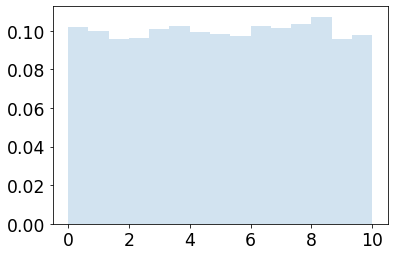

In [2]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

n = 10000
vmin, vmax = (0, 10)
v = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=n)
retval = plt.hist(v, bins=15, density=True, histtype='stepfilled', alpha=0.2)

配列の要素の昇順への並べ替えは，
[`numpy.argsort()`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
と 
[`numpy.take_along_axis()`](https://numpy.org/doc/stable/reference/generated/numpy.take_along_axis.html)
の組合せで実現できる。

In [3]:
import numpy as np
v_hat = np.array([99, 77, 55, 33, 11])
idx = np.argsort(v_hat, axis=0)
print('idx ==', repr(idx))
v_hat_k = np.take_along_axis(v_hat, idx, axis=0)
print('v_hat ==', repr(v_hat))
print('v_hat_k ==', repr(v_hat_k))


idx == array([4, 3, 2, 1, 0], dtype=int64)
v_hat == array([99, 77, 55, 33, 11])
v_hat_k == array([11, 33, 55, 77, 99])
